# Visualising LSTM Networks Part 1

In [1]:
%matplotlib inline
from misc.misc import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
seed = 8
data_dir = './data'
model_weights_filename = './model_weights_final.hdf5'
autoenc2D_weights_file = './auto2D_model_weights.hdf5'
autoenc3D_weights_file = './auto3D_model_weights.hdf5'
train_size = 94*3*7
batch_size = 64
n_lstm = 100
epochs = 1000
noise = 0.1

# Auslan sign classifier

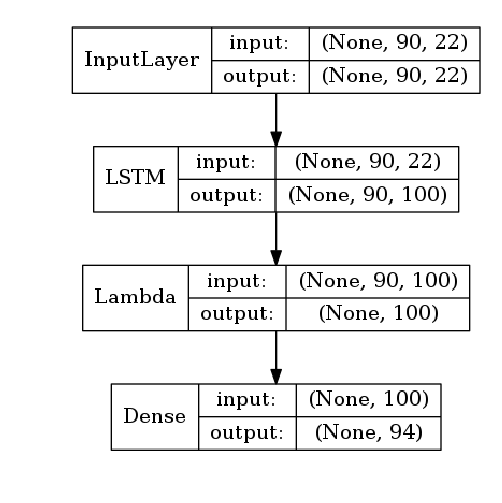

In [3]:
import pydot
from keras.utils import plot_model
import matplotlib.image as mpimg

X_train, X_validation, X_test, Y_train, Y_validation, Y_test, le = load_prepare_data(data_dir, train_size, seed)
model, lstm_activations = prepare_model(100, 'accuracy', X_train, Y_train, (0.0, 0.0), (0.0, 0.0))
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB')
img = mpimg.imread('model.png')
plt.figure(dpi=144)
plt.imshow(img)
plt.axis('off');

In [4]:
# model, history = fit_model(model, model_weights_filename, X_train, Y_train, X_validation, 
#                            Y_validation, seed, epochs=1000, patience=150, batch_size=64, verbosity=1)
model = load_model(model, model_weights_filename)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 98.92%


# Denoising Autoencoders

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


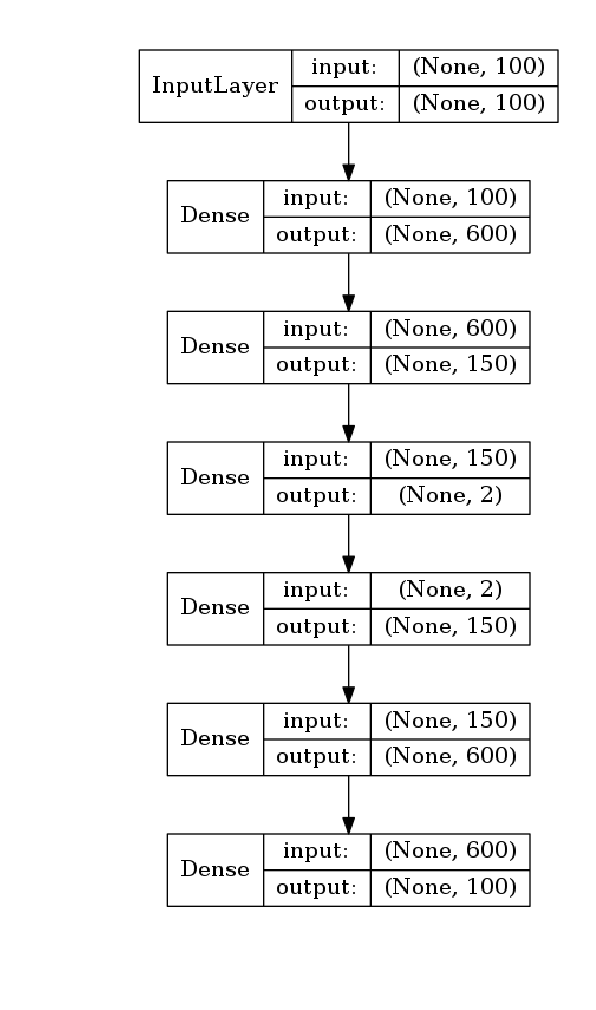

In [5]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

# def custom_activation(x):
#     return (K.tanh(x) * 20)

def custom_activation(x):
    return x

act = lstm_activations.predict(X_train)
labels = le.inverse_transform(np.argmax(Y_train, axis=1))
X_autoencoder, Y_autoencoder = prepare_autoencoder_input(act, noise, seed, min_=10, max_=65)

decoded2D, encoded2D = prepare_autoencoder(n_lstm, 2, dense_1=600, dense_2=150, activation=custom_activation)
# decoded2D, _ = fit_autoencoder(decoded2D, X_autoencoder, Y_autoencoder, autoenc2D_weights_file, seed, patience=5, verbosity=0)
decoded2D = load_model(decoded2D, autoenc2D_weights_file)
decoded3D, encoded3D = prepare_autoencoder(n_lstm, 3, dense_1=600, dense_2=150, activation=custom_activation)
# decoded3D, _ = fit_autoencoder(decoded3D, X_autoencoder, Y_autoencoder, autoenc3D_weights_file, seed, patience=5, verbosity=1)
decoded3D = load_model(decoded3D, autoenc3D_weights_file)

plot_model(decoded2D, to_file='2Dautoencoder.png', show_shapes=True, show_layer_names=False, rankdir='TB')
img = mpimg.imread('2Dautoencoder.png')
plt.figure(dpi=2*144)
plt.imshow(img)
plt.axis('off');

# Visualization

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


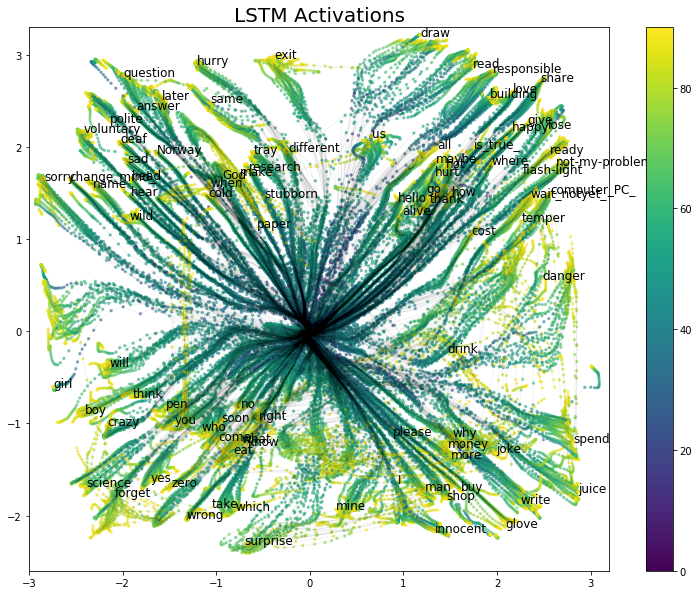

In [6]:
act = lstm_activations.predict(X_train)
labels = le.inverse_transform(np.argmax(Y_train, axis=1))
set_labels = sorted(set(labels))
plot_2D(set_labels, encoded2D, act, labels, 'LSTM Activations', 'lstm2d.png', -3, 3.2, -2.6, 3.3, 
    figsize=(13,10), frac_labels=0.0, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


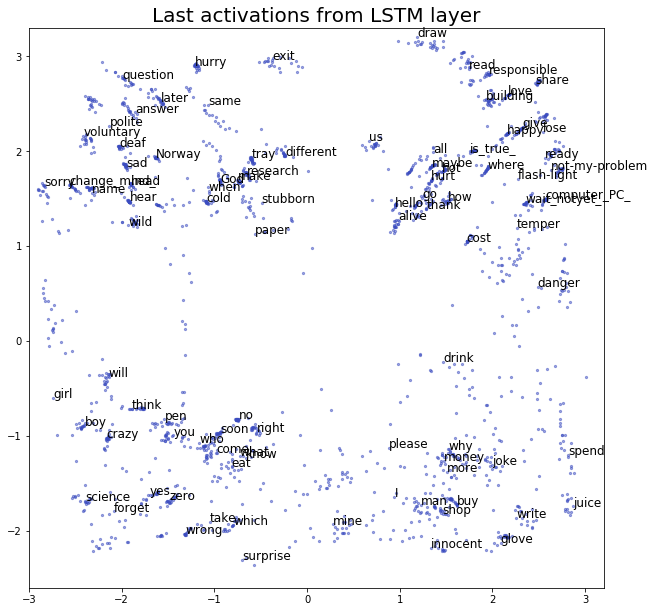

In [7]:
act = lstm_activations.predict(X_train)
labels = le.inverse_transform(np.argmax(Y_train, axis=1))
set_labels = sorted(set(labels))
plot_2D(set_labels, encoded2D, act, labels, 'Last activations from LSTM layer', 'lstm2d_last_activation.png', -3, 3.2, -2.6, 3.3, 
        figsize=(10.3,10.3), frac_labels=0.00, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, min_steps=89, max_steps=90, show=True, log=True,
        colormap=cm.coolwarm, scatter=True, colorbar_show=False)

In [ ]:
plot_2D(set_labels, encoded2D, act, labels, 'LSTM Activations', 'lstm2d_BIG.png', -3, 3.2, -2.6, 3.3, 
        figsize=(50,40), frac_labels=0.2, linewidth=1, pointsize=5, fontsize=10, linealpha=0.05, 
        max_steps=90, show=True, log=True)

In [ ]:
plot_3D(set_labels, encoded3D, act, labels, 'LSTM Activations 3D', 'lstm3d.png', x_l=-2.5,
            x_h=2.5, y_l=-2.5, y_h=2.5, figsize=(13, 13), pointsize=5, max_steps=90,
            show=True, log=True)

# Analysis

In [ ]:
# determining if the gesture is one- or two-handed

diff = X_train[:,:-1,:] - X_train[:,1:,:]
plt.show()
side = []
for i in range(diff.shape[0]):
    lh = np.abs(diff[i,:,:11])
    rh = np.abs(diff[i,:,11:])
    lh = np.sort(lh.flatten())[:950]
    rh = np.sort(rh.flatten())[:950]
    side.append(lh.mean() / rh.mean())
plt.hist(side, bins=300);

In [ ]:
set_labels = sorted(set(labels))
one_hand = np.array(side) < 0.25
plot_2D(set_labels, encoded2D, act, labels, 'Activation paths categorized by hand usage', 'lstm2d_hands.png', -3, 3.2, -2.6, 3.3, 
        figsize=(10.3,10.3), frac_labels=0.0, linewidth=2, pointsize=3, fontsize=12, linealpha=0.05, 
        max_steps=90, show=True, log=True, hand=one_hand, colormap=cm.Greys, scatter=False, colorbar_show=False)

In [ ]:
set_labels = ['drink', 'danger']
plot_2D(set_labels, encoded2D, act, labels, 'LSTM activations for drink and danger', 'lstm2d_drink_danger.png', -3, 3.2, -2.6, 3.3, 
    figsize=(13,10), frac_labels=0.4, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

In [ ]:
set_labels = ['who', 'soon']
plot_2D(set_labels, encoded2D, act, labels, 'LSTM activations for who and soon', 'lstm2d_who_soon.png', -3, 3.2, -2.6, 3.3, 
    figsize=(13,10), frac_labels=0.1, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

In [ ]:
set_labels = ['crazy', 'think']
plot_2D(set_labels, encoded2D, act, labels, 'LSTM activations for think and crazy', 'lstm2d_think_crazy.png', -3, 3.2, -2.6, 3.3, 
    figsize=(13,10), frac_labels=0.1, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

In [ ]:
set_labels = ['sorry', 'crazy', 'you', 'think']
plot_2D(set_labels, encoded2D, act, labels, 'LSTM activations for think, crazy, sorry and you', 'lstm2d_you.png', -3, 3.2, -2.6, 3.3, 
    figsize=(13,10), frac_labels=0.2, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

# Mislabeled examples

In [ ]:
X = X_train
Y = Y_train

pred = le.inverse_transform(model.predict(X).argmax(axis=1))
true = le.inverse_transform(Y.argmax(axis=1))
mislabel = pred != true
pairs = np.array(list(zip(pred, true)))
set_labels = sorted(set(pairs[mislabel].flatten()))
act = lstm_activations.predict(X)
labels = le.inverse_transform(np.argmax(Y, axis=1))

plot_2D_mislabeled(set_labels, encoded2D, act, labels, 'Training data mislabeled examples', 'lstm2d-mislabel_train.png', mislabel, pairs,-2, 2, -0.2, 2.3, 
                       figsize=(13,10), frac_labels=0.0, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

In [ ]:
X = X_validation
Y = Y_validation

pred = le.inverse_transform(model.predict(X).argmax(axis=1))
true = le.inverse_transform(Y.argmax(axis=1))
mislabel = pred != true
pairs = np.array(list(zip(pred, true)))
set_labels = sorted(set(pairs[mislabel].flatten()))
act = lstm_activations.predict(X)
labels = le.inverse_transform(np.argmax(Y, axis=1))

plot_2D_mislabeled(set_labels, encoded2D, act, labels, 'Validation data mislabeled examples', 'lstm2d-mislabel_valid.png', mislabel, pairs,-3, 3.5, -2.3, 2.5, 
                       figsize=(13,10), frac_labels=0.0, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

In [ ]:
X = X_test
Y = Y_test

pred = le.inverse_transform(model.predict(X).argmax(axis=1))
true = le.inverse_transform(Y.argmax(axis=1))
mislabel = pred != true
pairs = np.array(list(zip(pred, true)))
set_labels = sorted(set(pairs[mislabel].flatten()))
act = lstm_activations.predict(X)
labels = le.inverse_transform(np.argmax(Y, axis=1))

plot_2D_mislabeled(set_labels, encoded2D, act, labels, 'Test data mislabeled examples', 'lstm2d-mislabel_test.png', mislabel, pairs,-2.4, 3.2, -2.2, 3.1, 
                       figsize=(13,10), frac_labels=0.0, linewidth=1, pointsize=5, fontsize=12, linealpha=0.05, max_steps=90, show=True, log=True)

# Prediction visualisation

In [ ]:
act = lstm_activations.predict(X_train)
labels = le.inverse_transform(np.argmax(Y_train, axis=1))
set_labels = sorted(set(labels))

# Uncomment VVV to generate frames for video

# for i in range(150):
#     plot_2D(set_labels, encoded2D, act, labels, 'LSTM Activations', 'lstm2d-{:03d}.png'.format(i), -3, 3.2, -2.6, 3.3, 
#             figsize=(18,15), frac_labels=0.0, linewidth=1, pointsize=5, fontsize=12, linealpha=0.03, max_steps=i, show=False, log=True)